In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
from utils import *
from numpy.fft import fft2, ifft2, fftshift

In [2]:
img_ref = cv2.cvtColor( cv2.imread("images/cameraman.tif"), cv2.COLOR_BGR2GRAY)
M, N = img_ref.shape[:2]

In [3]:
fraction_missing = 0.5
SNRdb = 20

# algorithm parameters
bias = 1e-3
updateTau1 = lambda x: x# min(x*1.02, 2)
updateTau2 = lambda x: x #min(x*1.02, 4)
maxiters = 2000
tau1 = 0.025
tau2 = 0.1
tol = 1e-6

In [4]:
mask = np.random.rand( img_ref.shape[0],img_ref.shape[1] )>fraction_missing

def A_op(x):
    y = np.multiply(mask, x)
    return y

In [5]:
y = A_op( addGaussianNoise(img_ref, SNRdb) )

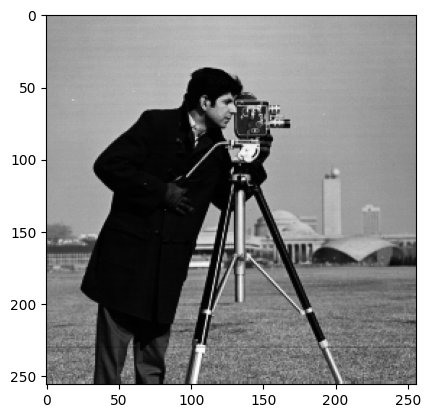

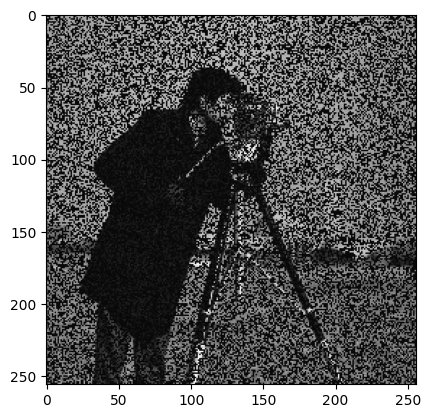

In [6]:
plt.figure(1)
plt.imshow(img_ref, cmap=plt.cm.gray)

plt.figure(2)
plt.imshow(y, cmap=plt.cm.gray)

In [7]:
y_missing = y.copy()
y_missing[y_missing<0]= 0

In [8]:
from blindInpaint import blindInpaint

BI_obj = blindInpaint( y=y_missing, model='gaussian')

In [9]:
x_hat, mask_est, obj, times, err_x, err_mask = BI_obj.blindInpaint_gaussian(y_missing, tau1, tau2,\
                bias=bias,\
                x_true = img_ref,\
                mask_true = mask,\
                maxiters = maxiters,\
                stopcriterion = 1,\
                cont_tau1 = updateTau1,\
                cont_tau2 = updateTau2,
                tol=tol)

ISNR = myISNR(img_ref,y,x_hat)
numMaskErrors = np.sum( np.logical_xor(mask,mask_est) )

print('%d iters, %.2f seconds, ISNR: %.2f dB, Mask errors: %.2f %%'%(len(times),\
                                                                    times[-1],\
                                                                    ISNR, numMaskErrors*100/(M*N) ) )

937 iters, 19.48 seconds, ISNR: 16.18 dB, Mask errors: 2.70 %


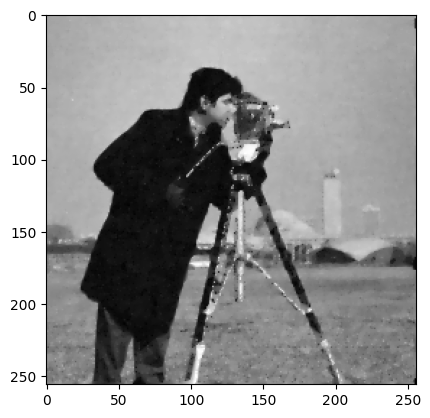

In [10]:
maxthresh = lambda x,th: np.multiply(x,x<=th)+th*(x>th)
plt.imshow( maxthresh(x_hat,255),cmap='gray')